<a href="https://colab.research.google.com/drive/1tnOvFNgXiLtktiSsltTr0s308LZSsEPJ">Abre este Jupyter en Google Colab</a>

# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 0. Imports

In [1]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [7]:
import numpy as np

### 1. Generación del conjunto de datos

In [19]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
print(" la longitud de datos es: ", len(X))

 la longitud de datos es:  100


### 2. Visualización del conjunto de datos

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

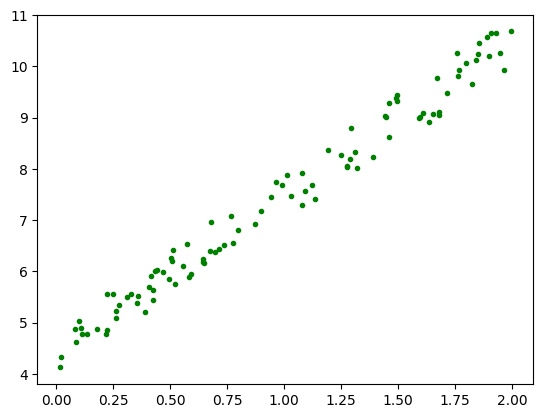

In [21]:
plt.plot(X, y, "g.")
plt.show()

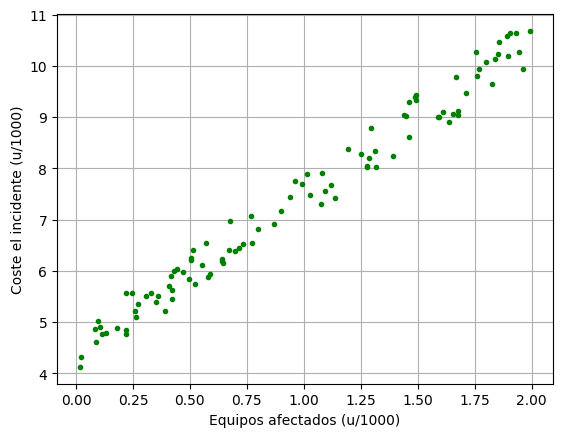

In [24]:
plt.plot(X, y, "g.")
plt.grid(True)
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste el incidente (u/1000)")
plt.show()

### 3. Modificación del conjunto de datos

In [25]:
import pandas as pd

In [38]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten() }
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.513664,6.412773
1,0.015612,4.121885
2,1.840628,10.131919
3,1.276095,8.049417
4,0.272414,5.342856
5,1.461824,9.291609
6,1.897552,10.193557
7,0.021143,4.324473
8,0.505661,6.208328
9,1.635380,8.908916


In [39]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')

#Escalado del coste
df['coste'] = df['coste'] * 1000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,513,6412
1,15,4121
2,1840,10131
3,1276,8049
4,272,5342
5,1461,9291
6,1897,10193
7,21,4324
8,505,6208
9,1635,8908


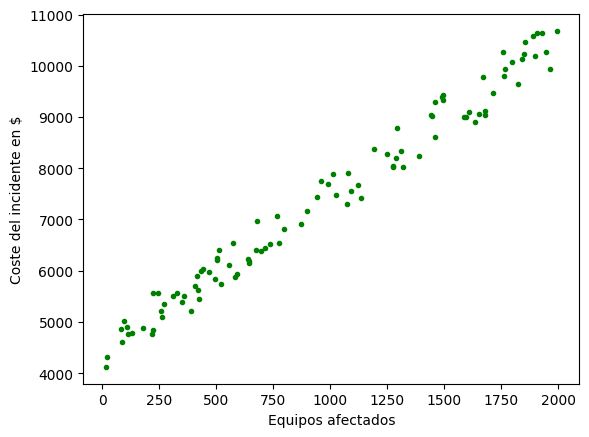

In [42]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "g.")
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente en $')
plt.show()

### 4. Construcción del modelo

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
# Construcción del modelo y ajuste de la función hipótesis
lin_regression = LinearRegression()
lin_regression.fit(df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
# Parámetro theta 0
lin_regression.intercept_

np.float64(4425.529268362641)

In [50]:
lin_regression.coef_

array([3.05084068])

In [53]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_regression.predict(X_min_max)

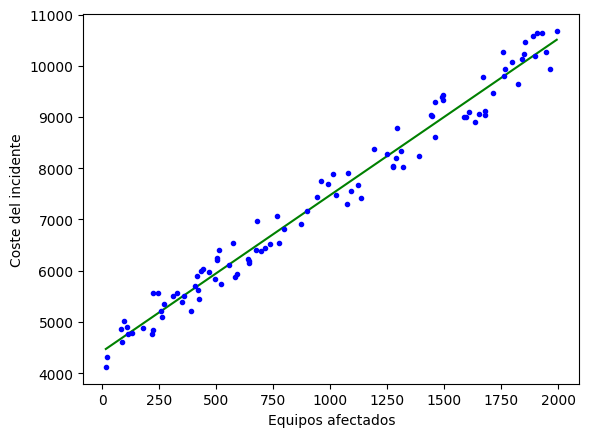

In [54]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df["n_equipos_afectados"], df["coste"], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [64]:
x_new = np.array([[1200]]) # 1000 equipos afectados

#Prediccion del costo que tendria el incidente
costo =  lin_regression.predict(x_new)
print("El costo del incidente seria:", int(costo[0]), "$")


El costo del incidente seria: 8086 $


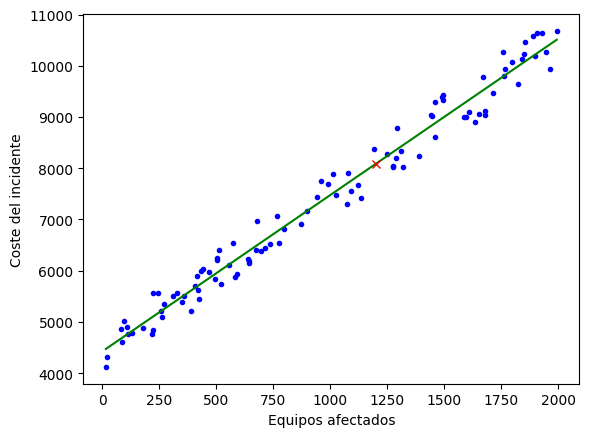

In [65]:
plt.plot(df["n_equipos_afectados"], df["coste"], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, costo, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()